Pablo Fernández Lema

In [1]:
import sympy as sp
import numpy as np

El dominio de esta función es : (0, oo)


'La función es creciente en: '

Range(4, oo, 1)

'La función es decreciente en: '

Range(1, 4, 1)

[!] Dado que la función solo es creciente en todo su dominio, deducimos que no va a tener ningún extremo relativo en su dominio


'Función es convexa en:'

Range(1, oo, 1)

'Función es cóncava en:'

EmptySet

CONCLUSIÓN: El dominio de la función es todo x > 0. | Es creciente y convexa en todo su dominio y no tiene extremos relativos.


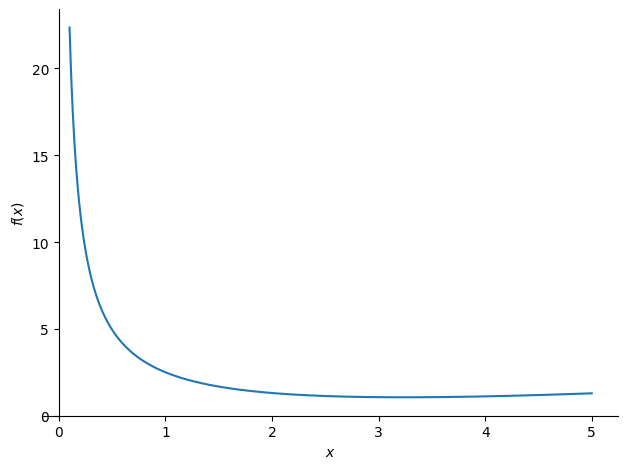

In [2]:
# Ejercicio 1
x = sp.Symbol("x", real=True)
f_expr = ((x**2 + 4) / (2*x) ) - sp.log(x)
f = sp.Lambda(x , f_expr)

# El dominio de está función está formada por todos los numeros que cumplan que: 2x != 0 y x > 0. Por lo que deducimos el intervalo (0 , oo)
print("El dominio de esta función es : (0, oo)")

# CRECIMIENTO: calculamos el signo de la primera derivada de la función
df = sp.diff(f(x), x)

# Forzamos a que el dominio sean los naturales pues la función solo está definida para x > 0
crec = sp.solveset( df > 0 , x , domain=sp.Naturals)    # La función crecre para todo x > 0
decrec = sp.solveset( df < 0 , x , domain=sp.Naturals)  # La función no decrece 

display("La función es creciente en: ", crec)
display("La función es decreciente en: ", decrec)

print("[!] Dado que la función solo es creciente en todo su dominio, deducimos que no va a tener ningún extremo relativo en su dominio")

# CONCAVIDAD Y CONVEXIDAD: calculamos el signo de la segunda derivada.
d2f = sp.diff(f(x), x ,2 )

# Forzamos a que el dominio sean los naturales pues la función solo está definida para x > 0
convexa = sp.solveset(d2f > 0, x, domain=sp.Naturals)   # Es convexa para todos los x > 0
concava = sp.solveset(d2f < 0, x, domain=sp.Naturals)   # Nunca es cóncava

display("Función es convexa en:", convexa)
display("Función es cóncava en:", concava)

# Conclusiones
print("CONCLUSIÓN: El dominio de la función es todo x > 0. | Es creciente y convexa en todo su dominio y no tiene extremos relativos.")

sp.plot(f(x) , (x , 0.1 , 5))  # Representamos la función para verificar los resultados

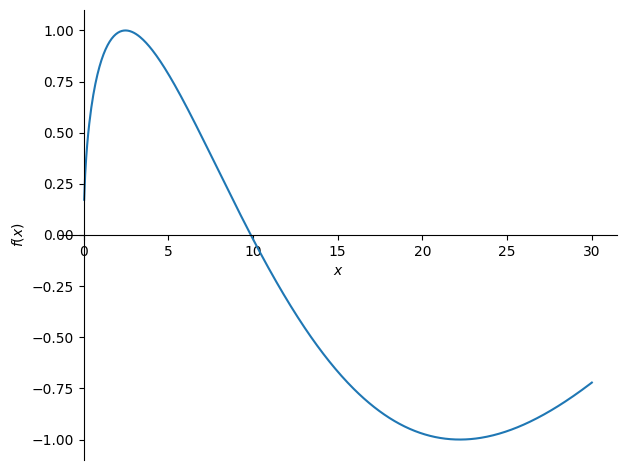

In [ ]:
# Ejercicio 2
g_expr = sp.sin(sp.sqrt(x)) # Definimos la expresión
 
g = sp.Lambda(x,g_expr)

sp.plot(g , (x , -30 , 30)) # Representamos la función para orientarnos sobre qué intervalo debemos coger para que el método pueda converger. Para el intervalo ( -30 , 30) observamos que la función podrá converger alrededor de x = 10. Por lo tanto, la función solo convergerá para un intervalo cercano a 10.5

In [36]:

N_max = 100    # Maximo de iteraciones
tol = 1.e-10   # Tolerancia de error
inf = 9         # Extremo izquierdo del intervalo inicial
sup = 10        # Extremo derecho del intervalo inicial

x_aprox = np.zeros(N_max)

# !! Comprobamos mediante el teorema de Bolzano si puede existir la raiz !!
if g(inf) * g(sup) > 0:
    print(f"[!] No se cumple el teorema de Bolzano en el intervalo [{inf} , {sup}]")

else:   
    for k in range(0,N_max):
        x_aprox[k] = (inf + sup) / 2      # Punto medio del intervalo [a,b]
    
        if np.abs(g(x_aprox[k])) < tol:  # El valor de la función en x_aprox[k] es suficientemente pequeño, por lo que es una raíz
           break
        
        if g(inf) * g(x_aprox[k]) < 0:   # Comprobamos con Bolzano si el nuevo intervalo es inf y el valor medio o el valor medio y sup
            sup = x_aprox[k]
        else:   # f(x_aprox[k] * f(b) < 0)
            inf = x_aprox[k]

        print("Error absoluto de la iteracion", k ,":" ,  np.abs(x_aprox[k] - x_aprox[k-1]))  # Calculamos el error absoluto de la iteración

        # Criterio de parada        
        if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): 
            break

    print("> Número de iteraciones realizadas: ", k+1) # Contamos 1 más porque empezamos el bucle en 0
    print("> Aproximación de la raíz: ", x_aprox[k])
    print("> Imágen de la aproximación: ", g(x_aprox[k]))

Error absoluto de la iteracion 0 : 9.5
Error absoluto de la iteracion 1 : 0.25
Error absoluto de la iteracion 2 : 0.125
Error absoluto de la iteracion 3 : 0.0625
Error absoluto de la iteracion 4 : 0.03125
Error absoluto de la iteracion 5 : 0.015625
Error absoluto de la iteracion 6 : 0.0078125
Error absoluto de la iteracion 7 : 0.00390625
Error absoluto de la iteracion 8 : 0.001953125
Error absoluto de la iteracion 9 : 0.0009765625
Error absoluto de la iteracion 10 : 0.00048828125
Error absoluto de la iteracion 11 : 0.000244140625
Error absoluto de la iteracion 12 : 0.0001220703125
Error absoluto de la iteracion 13 : 6.103515625e-05
Error absoluto de la iteracion 14 : 3.0517578125e-05
Error absoluto de la iteracion 15 : 1.52587890625e-05
Error absoluto de la iteracion 16 : 7.62939453125e-06
Error absoluto de la iteracion 17 : 3.814697265625e-06
Error absoluto de la iteracion 18 : 1.9073486328125e-06
Error absoluto de la iteracion 19 : 9.5367431640625e-07
Error absoluto de la iteracion 2